# GOOGLE PLAYSTORE DATA
### Complete EDA Analysis for Bignners to Advance  

## About Dataset

## Description
The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)


**Context** While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content** Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements** This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration** The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline

# 2. Data Loading and exploration and cleaning

↪ Load the csv file with the pandas

↪ creating the dataframe and understanding the data present in the dataset using pandas

↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
df = pd.read_csv('./data/googleplaystore.csv')

- Viewing the first five Rows of the data

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [4]:
# set option to be  maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Hide all warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Unnamed: 13'],
      dtype='object')

In [6]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 10841
Number of columns: 14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Unnamed: 13     0 non-null      float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [8]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [9]:
df.describe()

,Rating,Reviews,Unnamed: 13
count,9367.000000,1.084100e+04,0.0
mean,4.191513,4.441119e+05,NaN
std,0.515735,2.927629e+06,NaN
min,1.000000,0.000000e+00,NaN
25%,4.000000,3.800000e+01,NaN
50%,4.300000,2.094000e+03,NaN
75%,4.500000,5.476800e+04,NaN
max,5.000000,7.815831e+07,NaN


# How to make size a numeric value

In [10]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
34M                     63
3.7M                    63
32M                     63
3.0M                    62
3.8M                   

---
# Observation

1. "varies with device"
2. K
3. M
 ---  

In [11]:
df['Size'].isnull().sum()

np.int64(0)

- No Missing value in Size, we are good to go

Verify the number of values and 3 different kind of values

In [12]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [13]:
# find the values in size column which has 'KB' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [14]:
# find the values in size column which has 'varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [15]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

- We have 8830 values in M units
- We have 316 values in k units
- We have 1695 value in Varies with device

Let's convert the M and K units into bytes and then remove the M and K from the values and convert them into numeric data type.

In [16]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [17]:
df['Size'].value_counts()

Size
11534336.0     198
12582912.0     196
14680064.0     194
13631488.0     191
15728640.0     184
17825792.0     160
19922944.0     154
16777216.0     149
27262976.0     149
10485760.0     146
26214400.0     143
20971520.0     139
22020096.0     138
25165824.0     136
18874368.0     133
24117248.0     117
23068672.0     114
30408704.0     103
28311552.0      97
29360128.0      95
31457280.0      84
34603008.0      79
3460300.8       77
38797312.0      76
36700160.0      72
32505856.0      70
3040870.4       69
2411724.8       68
2621440.0       68
3565158.4       65
2936012.8       65
35651584.0      63
33554432.0      63
3879731.2       63
3984588.8       62
3145728.0       62
4089446.4       62
41943040.0      62
4194304.0       61
46137344.0      61
37748736.0      60
48234496.0      59
4404019.2       59
50331648.0      59
5242880.0       58
3774873.6       57
40894464.0      56
3250585.6       56
39845888.0      55
3355443.2       55
4508876.8       54
2831155.2       53
4299161

In [18]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [19]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [20]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8


- Let's have a look on the Installs column

In [21]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
df['Installs'].value_counts().sum()

np.int64(10841)

we have no missing in this column, we are go to next

# Install
1. Remove + sign
2. Remove ,
3. Convert an into int. 

In [23]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [24]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [25]:
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [26]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

- Let's verify if the dtypes has been changes and the + and , sign has been removed

In [27]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8


# Price Column

In [28]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

## we are going to remove $ sign

In [29]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [30]:
df['Price'] = df['Price'].apply(lambda x: int(float(x)))

In [31]:
df['Price'].dtype

dtype('int64')

In [32]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [33]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Unnamed: 13,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,0.0,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,0.961719,NaN,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.896201,NaN,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,NaN,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,NaN,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,NaN,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,NaN,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,NaN,100.000000


In [34]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0 $
Max price is: 400 $
Average price is: 0.9617193985794669 $


# 2.1. Descriptive Statistics

- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
- We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 78+ Millions, which is the range of reviews, and the mean is 444,111.93 which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.
Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

# Missing values

In [35]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 13       10841
Size_in_Mb         1695
Size_in_bytes      1695
Rating             1474
Current Ver           8
Android Ver           2
Category              1
Genres                1
Type                  1
App                   0
Reviews               0
Installs              0
Last Updated          0
Price                 0
Content Rating        0
dtype: int64

In [36]:
df.isnull().sum().sum()

np.int64(15718)

<Axes: >

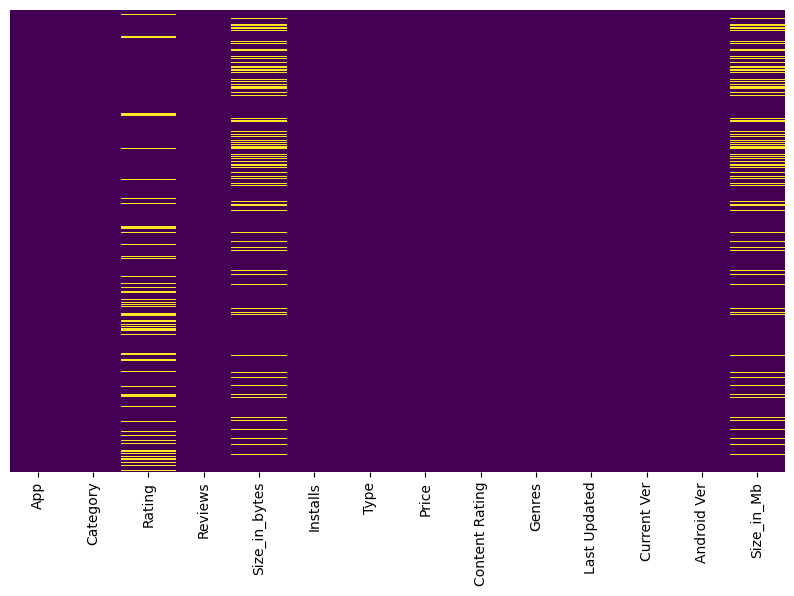

In [41]:
# plot the missing values in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [39]:
df['Unnamed: 13'].dtype

dtype('float64')

In [40]:
df.drop(columns=['Unnamed: 13'], inplace=True)

- There is another way, let's plot the missing values by percentage

In [ ]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')